In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from performance_simulation import *

/Users/leon/sciebo/code_decrypted/Python_encrypted/boerse/performance_simulation.py:615: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if limits is 'minmax':


In [2]:
#General parameters
years = 5
dt = 15
time = 261 * years

#Simulation parameters
yearly_return = 1.07

daily_return = 1.001
daily_loss = 1 - 0.01

gain_phase = 0.7
loss_phase = 1 - gain_phase

mode = "constant_timesteps"
#mode = "constant_gain"


#Tade parameters
trades = 12 * years
max_trades = 20 * years
hold_time = 20
time_after_reversel = 0
smooth_period = 20

trade_coast = 1
spread = 0.002
tax_rate = 0.025
tax_allowance = 1000

initial_capital = 5000
saving_plan = 100
saving_plan_time = 22


sim = ChartSimulation(yearly_return=yearly_return, daily_return=daily_return, daily_loss=daily_loss, gain_phase=gain_phase, loss_phase=loss_phase, mode=mode, 
                      initial_capital=initial_capital, saving_plan=saving_plan, saving_plan_time=saving_plan_time,  dt=dt, time=time, 
                      trades=trades, max_trades=max_trades, hold_time=hold_time, time_after_reversel=time_after_reversel, smooth_period=smooth_period, trade_coast=trade_coast, spread=spread, tax_rate=tax_rate, tax_allowance=tax_allowance
                      )

performance, phase = sim.simulate_performance()

buy_and_hold_performance = sim.buy_and_hold(set='simulation')[0]
random_swing_performance_analyse = sim.random_swing_trade_ana(set='simulation')[0]
swing_performance_analyse = sim.swing_trade_ana(set='simulation')[0]

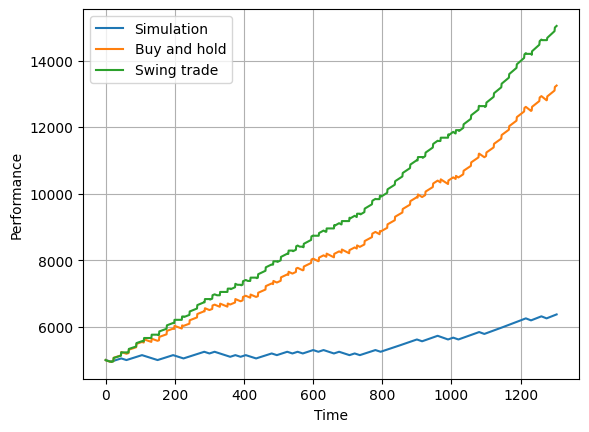

Initial capital:  5000
Total money invested:  10931

Index performance:
    Absolute: 6371.383, Relative: 1.274
    Yearly return: 1.05

Buy and hold return:
    Absolute: 13248.191, Relative: 1.212
    Yearly performance: 1.039
    Taxes: 0, Transaction cost: 81.68

Swing trade return:
    Absolute: 15039.968, Relative: 1.376
    Yearly performance: 1.066
    Taxes: 19.156, Transaction cost: 498.217

Random swing trade return:
    Absolute: 10498.199, Relative: 0.96
    Yearly performance: 0.992
    Taxes: 0, Transaction cost: 1048.457

Best return:  8617.697


In [3]:
plt.plot(performance, label="Simulation")
plt.plot(buy_and_hold_performance, label="Buy and hold")
plt.plot(swing_performance_analyse, label="Swing trade")
#plt.plot(random_swing_performance_analyse, label="Random swing trade")
#plt.axhline(1, color="black", linestyle="--")   

plt.xlabel("Time")
plt.ylabel("Performance")

plt.grid()
plt.legend()

#plt.yscale("log")

plt.show()


#sim.print_parameters()
sim.print_results(accuracy=3)
#sim.plot_performance()

In [ ]:
mc = MonteCarloSimulation(chartsim=sim, parallel=True)
_ = mc.mc_artificial_chart(n=500)

# mc.hist_performance(bins=30)

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:13<00:00, 37.26it/s]


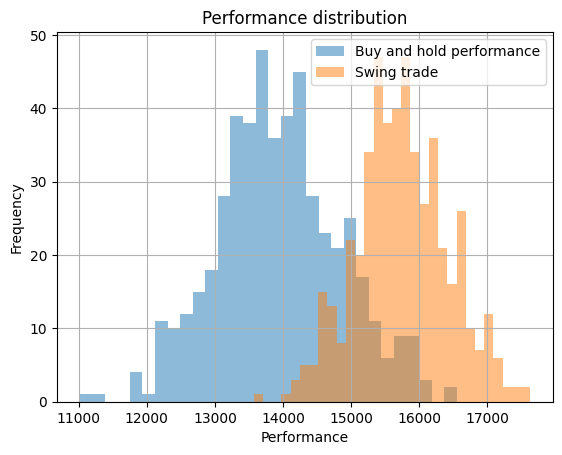

Initial capital:  5000
Total money invested:  10931

Index performance:
  Overall return: 7033.579 +/- 583.85 (Median: 7021.854)
  Yearly performance: 1.07 +/- 0.018 (Median: 1.07)

Buy and hold return:
  Overall return: 13949.895 +/- 912.074 (Median: 13912.901)
  Yearly performance: 1.05 +/- 0.014 (Median: 1.049)
  Taxes: 0.0 +/- 0.0 (Median: 0.0)
  Transaction cost: 81.68 +/- 0.0 (Median: 81.68)

Swing trade return:
  Overall return: 15749.291 +/- 672.752 (Median: 15715.696)
  Yearly performance: 1.076 +/- 0.009 (Median: 1.075)
  Taxes: 25.267 +/- 14.11 (Median: 25.047)
  Transaction cost: 450.559 +/- 53.642 (Median: 450.839)

Random swing trade return:
  Overall return: 11000.179 +/- 413.554 (Median: 10979.966)
  Yearly performance: 1.001 +/- 0.008 (Median: 1.001)
  Taxes: 0.006 +/- 0.102 (Median: 0.0)
  Transaction cost: 1105.445 +/- 30.491 (Median: 1104.96)



In [6]:


bins=30
limits=None

#plt.hist(mc.index_performance, bins=bins, range=limits, alpha=0.5, label="Index Performance")
plt.hist(mc.buy_and_hold_profit, bins=bins, range=limits, alpha=0.5, label="Buy and hold performance")
plt.hist(mc.swing_profit, bins=bins, range=limits, alpha=0.5, label="Swing trade")
#plt.hist(mc.random_swing_profit, bins=bins, range=limits, alpha=0.5, label="Random swing trade")

plt.xlabel("Performance")
plt.ylabel("Frequency")
plt.title("Performance distribution")

plt.grid()
plt.legend()
plt.show()

mc.print_results(accuracy=3)